### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from setuptools.command.rotate import rotate

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [43]:
data = pd.read_csv('data/coupons.csv')

In [44]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [46]:
print(data.shape)
data.isna().sum()

(12684, 26)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [60]:
# Print unique values for each column to identify problematic data.
def print_columns_unique_values(df):
    for column in df.columns:
        print(f"Column Name: {column}, DataType: {df[column].dtype}")
        print(df[column].unique())
        print("\n")

3. Decide what to do about your missing data -- drop, replace, other...

In [48]:
# Create a copy of the original data.
df = data

# There are 12,684 rows and df['cars'] has 12,576 nan values. Drop the column
df = df.drop(columns=['car'])

df.isna().sum()


destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [49]:
# The columns Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restarant20To50 has nan. These rows represent less than 5% of the total 12,684 rows. Drop these rows

df.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], inplace=True)

df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [50]:
# Convert columns to appropriate data types

df['age'].unique()


array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [55]:
# There are two string values in age 50plus and below21. Convert these to int values 51 and 18 respectively.


df['age'] = df['age'].replace({'50plus': '51', 'below21': '18'})

df['age'].info()

# Convert age to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

df.isna().sum()

<class 'pandas.core.series.Series'>
Index: 12079 entries, 22 to 12683
Series name: age
Non-Null Count  Dtype 
--------------  ----- 
12079 non-null  object
dtypes: object(1)
memory usage: 188.7+ KB


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [56]:
df.describe()

,temperature,age,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,32.456909,0.408478,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,10.584966,0.491573,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,18.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,31.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,41.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,51.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
print_columns_unique_values(df)

Column Name: destination, DataType: object
['No Urgent Place' 'Home' 'Work']


Column Name: passanger, DataType: object
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


Column Name: weather, DataType: object
['Sunny' 'Rainy' 'Snowy']


Column Name: temperature, DataType: int64
[55 80 30]


Column Name: time, DataType: object
['2PM' '10AM' '6PM' '7AM' '10PM']


Column Name: coupon, DataType: object
['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']


Column Name: expiration, DataType: object
['1d' '2h']


Column Name: gender, DataType: object
['Male' 'Female']


Column Name: age, DataType: int64
[21 46 26 31 41 51 36 18]


Column Name: maritalStatus, DataType: object
['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']


Column Name: has_children, DataType: int64
[0 1]


Column Name: education, DataType: object
['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'


4. What proportion of the total observations chose to accept the coupon?



In [62]:

# Use the mean multiply by 100 to get percentage
proportion_accepted = df['Y'].mean() * 100

print(f'Total proportion of accepted coupon: {proportion_accepted:.2f}%')

Total proportion of accepted coupon: 56.93%


5. Use a bar plot to visualize the `coupon` column.

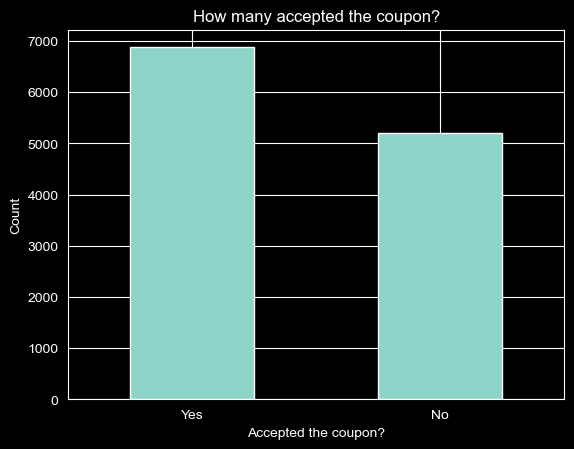

In [63]:
# Change 0/1 to No/Yes for better label visualization
df['Y'].map({0:'No', 1:'Yes'}).value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Accepted the coupon?')
plt.ylabel("Count")
plt.title("How many accepted the coupon?")
plt.show()

6. Use a histogram to visualize the temperature column.

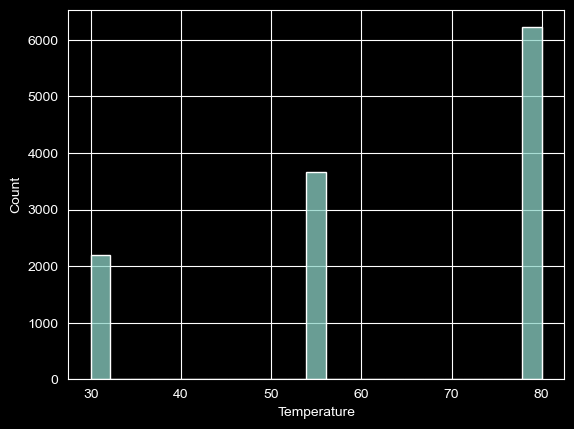

In [64]:
sns.histplot(df, x='temperature')
plt.xlabel("Temperature")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [65]:
# Get the coupon with value Bar
bar_df = df.query('coupon == "Bar"')
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [66]:
# Get the Bar coupon that were acccepted
bar_accepted = bar_df.query('Y == 1')

# Divide the number of accepted bar coupons by total bar coupons to get the proportion
proportion_bar_accepted = (bar_accepted.shape[0]/ bar_df.shape[0]) * 100

print(f'Proportion of accepted bar coupons: {proportion_bar_accepted:.2f}%')

Proportion of accepted bar coupons: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [78]:
# Show different values in the 'Bar' column for accepted bar coupons
print(bar_accepted['Bar'].value_counts())

less_than_3 = bar_accepted.query('Bar in ["never", "less1", "1~3"]')
more_than_3 = bar_accepted.query('Bar in ["4~8", "gt8"]')

acceptance_rate_less_than3 = (less_than_3.shape[0] / bar_df.shape[0]) * 100
acceptance_rate_more_than3 = (more_than_3.shape[0] / bar_df.shape[0]) * 100

print(f"Acceptance rate for drivers who went to a bar 3 or fewer times a month: {acceptance_rate_less_than3:.2f}%")
print(f"Acceptance rate for driver who wen more than 3: {acceptance_rate_more_than3:.2f}%")



Bar
less1    247
1~3      245
never    149
4~8      114
gt8       33
Name: count, dtype: int64
Acceptance rate for drivers who went to a bar 3 or fewer times a month: 33.51%
Acceptance rate for driver who wen more than 3: 7.68%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [83]:
# Query the drivers that goes to bar more than once and age > 25
over25_more_than1= bar_accepted.query('Bar in ["1~3", "4~8", "gt8"] and age > 25')
acceptance_rate_over25_more_than1 = (over25_more_than1.shape[0] / bar_df.shape[0]) * 100
# Negate the above query to get all others
all_others = bar_accepted.query('~(Bar in ["1~3", "4~8", "gt8"] and age > 25)')
acceptance_rate_all_others = (all_others.shape[0] / bar_df.shape[0]) * 100

print(f"Acceptance rate > once/month and > 25 years: {acceptance_rate_over25_more_than1:.2f}")
print(f"Acceptance rate all other: {acceptance_rate_all_others:.2f}")



Acceptance rate > once/month and > 25 years: 14.53
Acceptance rate all other: 26.66


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  